# test the basic module

In [1]:
%matplotlib inline

test numpy

In [2]:
import numpy as np
x = np.array([1, 2, 3])
print(type(x))
x

<class 'numpy.ndarray'>


array([1, 2, 3])

test matplotlib

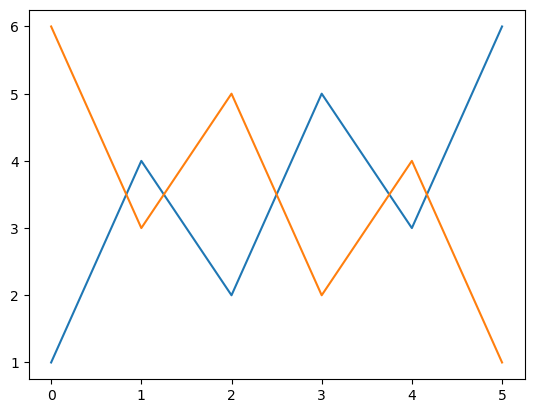

In [3]:
import matplotlib.pyplot as plt
a = np.array([6, 3, 5, 2, 4, 1])
plt.plot([1, 4, 2, 5, 3, 6])
plt.plot(a)

test matplotlib and numpy

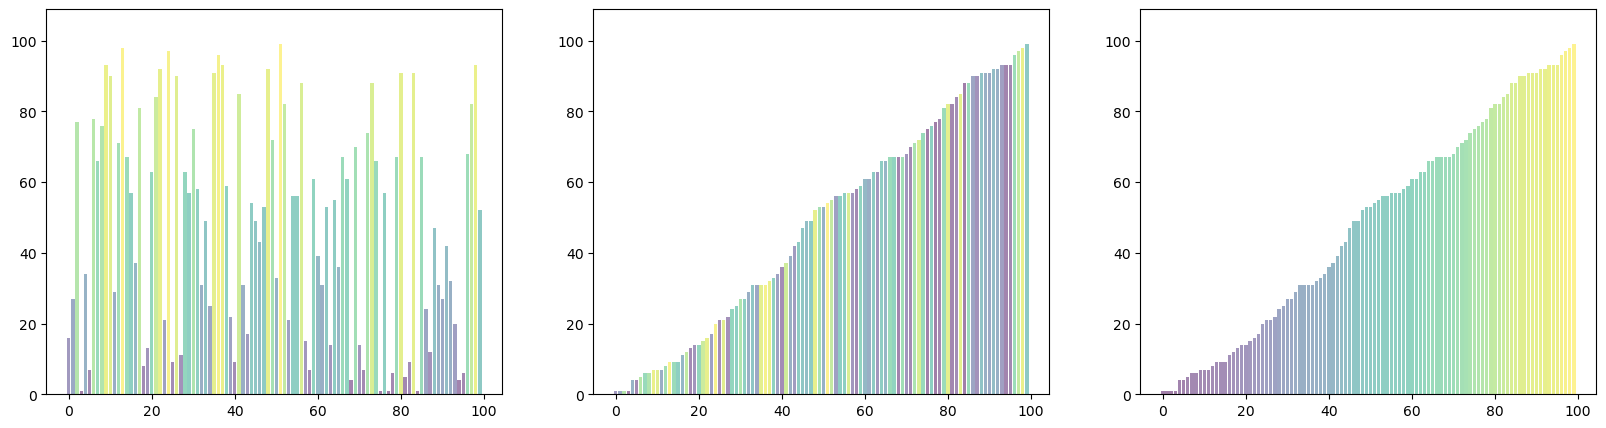

In [4]:
import matplotlib.pyplot as plt
import matplotlib.colors as col
import matplotlib.cm as cm
import numpy as np

# input data
mean_values = np.random.randint(1, 101, 100)
x_pos = range(len(mean_values))

fig = plt.figure(figsize=(20,5))

# create colormap
cmap = cm.ScalarMappable(col.Normalize(min(mean_values), 
                                       max(mean_values), 
                                       cm.hot))

# plot bars
plt.subplot(131)
plt.bar(x_pos, mean_values, align='center', alpha=0.5, 
        color=cmap.to_rgba(mean_values))
plt.ylim(0, max(mean_values) * 1.1)

plt.subplot(132)
plt.bar(x_pos, np.sort(mean_values), align='center', alpha=0.5, 
        color=cmap.to_rgba(mean_values))
plt.ylim(0, max(mean_values) * 1.1)

plt.subplot(133)
plt.bar(x_pos, np.sort(mean_values), align='center', alpha=0.5, 
        color=cmap.to_rgba(np.sort(mean_values)))
plt.ylim(0, max(mean_values) * 1.1)

plt.show()

test pysd

In [5]:
import pysd
model = pysd.read_vensim("third party/test-models/samples/teacup/teacup.mdl")
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Characteristic Time,characteristic_time,None,Minutes,"(0.0, nan)",Constant,Normal,How long will it take the teacup to cool 1/e o...
1,FINAL TIME,final_time,None,Minute,"(nan, nan)",Constant,Normal,The final time for the simulation.
2,Heat Loss to Room,heat_loss_to_room,None,Degrees Fahrenheit/Minute,"(nan, nan)",Auxiliary,Normal,This is the rate at which heat flows from the ...
3,INITIAL TIME,initial_time,None,Minute,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Room Temperature,room_temperature,None,Degrees Fahrenheit,"(-459.67, nan)",Constant,Normal,Put in a check to ensure the room temperature ...
5,SAVEPER,saveper,None,Minute,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Minute,"(0.0, nan)",Constant,Normal,The time step for the simulation.
7,Teacup Temperature,teacup_temperature,None,Degrees Fahrenheit,"(32.0, 212.0)",Stateful,Integ,The model is only valid for the liquid phase o...
8,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.


test run the model file

In [6]:
stocks = model.run()
stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
0.000,30,0,0.125,0.125,10,11.000000,70,180.000000
0.125,30,0,0.125,0.125,10,10.862500,70,178.625000
0.250,30,0,0.125,0.125,10,10.726719,70,177.267188
0.375,30,0,0.125,0.125,10,10.592635,70,175.926348
0.500,30,0,0.125,0.125,10,10.460227,70,174.602268
...,...,...,...,...,...,...,...,...
29.500,30,0,0.125,0.125,10,0.565131,70,75.651312
29.625,30,0,0.125,0.125,10,0.558067,70,75.580671
29.750,30,0,0.125,0.125,10,0.551091,70,75.510912
29.875,30,0,0.125,0.125,10,0.544203,70,75.442026


test plot the temperature of the model over time

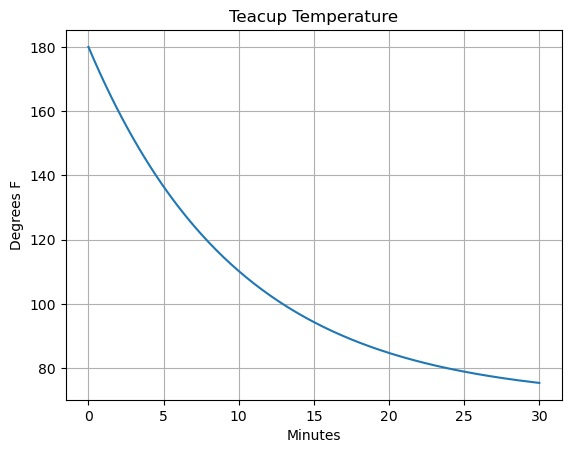

In [7]:
import matplotlib.pyplot as plt
stocks["Teacup Temperature"].plot()
plt.title("Teacup Temperature")
plt.ylabel("Degrees F")
plt.xlabel("Minutes")
plt.grid()